# Final Project_Data Wizards

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = 'C:\\Users\\bandh\\Documents\\MSIS program\\Flex 4\\IS7036\\Final Project\\Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(dataset)

# Selecting only the desired columns
selected_columns = ['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Completed', 'Household Size',
                    'Religion', 'Full Time Employment', 'Student', 'Homemaker', 'Occupation', 'Income',
                    'US Born', 'Duration of Residency', 'English Difficulties',
                    'Belonging', 'Present Health', 'Present Mental Health', 'Language', 'Quality of Life',
                    'Satisfied With Life 1', 'Close Family', 'Helpful Friends', 'Concerns']
df_filtered = df[selected_columns].copy()
print(f"Initial number of rows: {df_filtered.shape[0]}")

df_filtered.head()

Initial number of rows: 2609


,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Religion,Full Time Employment,Student,Homemaker,...,English Difficulties,Belonging,Present Health,Present Mental Health,Language,Quality of Life,Satisfied With Life 1,Close Family,Helpful Friends,Concerns
0,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Viet,NaN,NaN,NaN,NaN,NaN
1,60.0,Male,Chinese,Married,13.0,6.0,Buddhist,0,0,0,...,Not much,NaN,NaN,NaN,Chinese Simplified,NaN,NaN,NaN,NaN,NaN
2,23.0,Female,Chinese,Single,16.0,3.0,Buddhist,0,0,0,...,Much,Not very much,Very Good,Good,English,8.0,Disagree,NaN,4.0,traffic
3,73.0,Female,Chinese,Other,13.0,1.0,Protestant,0,0,0,...,NaN,NaN,Good,Very Good,Chinese Traditional,NaN,NaN,NaN,NaN,NaN
4,29.0,Male,Asian Indian,Single,17.0,1.0,Hindu,Employed full time,0,0,...,Very much,NaN,Good,Good,English,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop null values for each column and check the count of remaining rows
for col in df_filtered.columns:
    if col not in ['Close Family', 'Helpful Friends', 'Concerns']:
        df_filtered = df_filtered.dropna(subset=[col])

# Fill NaN values for 'Close Family' and 'Helpful Friends' with '0'
df_filtered['Close Family'].fillna('0', inplace=True)
df_filtered['Helpful Friends'].fillna('0', inplace=True)

# Fill NaN values for 'Concerns' with 'No Concerns'
df_filtered['Concerns'].fillna('No Concerns', inplace=True)

# Replace 'Employed Full Time' with 1 and others with 0
df_filtered['Full Time Employment'] = df_filtered['Full Time Employment'].apply(lambda x: 1 if x == 'Employed Full Time' else 0)

# Replace 'Student' with 1 and others with 0
df_filtered['Student'] = df_filtered['Student'].apply(lambda x: 1 if x == 'Student' else 0)

# Replace 'Full Time Homemaker' with 1 and others with 0
df_filtered['Homemaker'] = df_filtered['Homemaker'].apply(lambda x: 1 if x == 'Full Time Homemaker' else 0)


# Display the final count of rows
print(f"Number of rows after cleaning: {df_filtered.shape[0]}")



Number of rows after cleaning: 1607


In [4]:
df_filtered.dtypes

Age                      float64
Gender                    object
Ethnicity                 object
Marital Status            object
Education Completed      float64
Household Size           float64
Religion                  object
Full Time Employment       int64
Student                    int64
Homemaker                  int64
Occupation                object
Income                    object
US Born                   object
Duration of Residency    float64
English Difficulties      object
Belonging                 object
Present Health            object
Present Mental Health     object
Language                  object
Quality of Life          float64
Satisfied With Life 1     object
Close Family              object
Helpful Friends           object
Concerns                  object
dtype: object

In [5]:
df_filtered['Close Family'] = pd.to_numeric(df_filtered['Close Family'])
df_filtered['Helpful Friends'] = pd.to_numeric(df_filtered['Helpful Friends'])
df_filtered.dtypes

Age                      float64
Gender                    object
Ethnicity                 object
Marital Status            object
Education Completed      float64
Household Size           float64
Religion                  object
Full Time Employment       int64
Student                    int64
Homemaker                  int64
Occupation                object
Income                    object
US Born                   object
Duration of Residency    float64
English Difficulties      object
Belonging                 object
Present Health            object
Present Mental Health     object
Language                  object
Quality of Life          float64
Satisfied With Life 1     object
Close Family             float64
Helpful Friends          float64
Concerns                  object
dtype: object

In [6]:
#Encoding columns

# Initialize label encoders
label_encoders = {}

# Columns to label encode
columns_to_encode = ['Ethnicity', 'Marital Status', 'Income', 'English Difficulties',
                     'Belonging', 'Present Health', 'Present Mental Health', 'Satisfied With Life 1']

# Encode non-numerical columns
for column in columns_to_encode:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column])
    label_encoders[column] = le
    
# One-hot encode 'Gender' and 'US Born'
df_filtered = pd.get_dummies(df_filtered, columns=['Gender', 'US Born'])

df_filtered.head()



,Age,Ethnicity,Marital Status,Education Completed,Household Size,Religion,Full Time Employment,Student,Homemaker,Occupation,...,Language,Quality of Life,Satisfied With Life 1,Close Family,Helpful Friends,Concerns,Gender_Female,Gender_Male,US Born_No,US Born_Yes
6,28.0,0,1,17.0,2.0,Hindu,0,0,0,Professional,...,English,8.0,3,0.0,0.0,No Concerns,0,1,1,0
8,25.0,0,3,17.0,1.0,Hindu,0,0,0,Professional,...,English,10.0,5,3.0,5.0,No Concerns,0,1,1,0
11,43.0,5,1,17.0,3.0,Catholic,0,0,0,Professional,...,Viet,6.0,2,3.0,3.0,No Concerns,0,1,1,0
12,44.0,5,1,12.0,4.0,Buddhist,0,1,0,Service worker,...,Viet,8.0,2,2.0,2.0,"Traffic, Trees",1,0,1,0
13,44.0,2,2,16.0,4.0,Catholic,0,0,0,Other,...,English,8.0,0,0.0,0.0,No Concerns,1,0,1,0


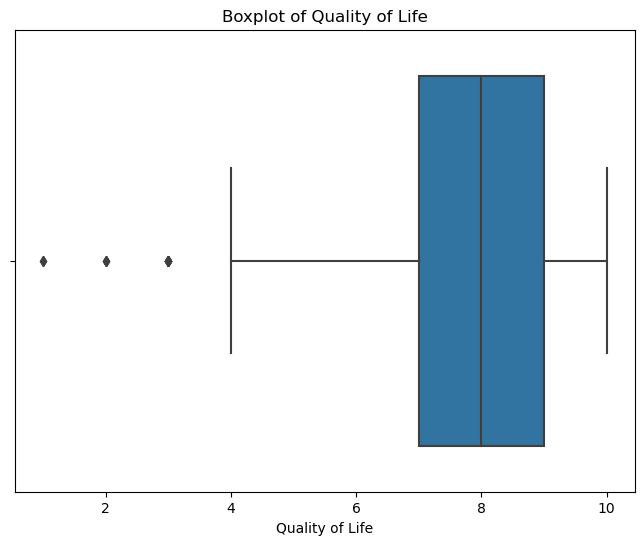

In [7]:
# Plotting boxplot for 'Quality of Life'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['Quality of Life'])
plt.title('Boxplot of Quality of Life')
plt.xlabel('Quality of Life')
plt.show()


In [8]:
# Removing outliers
df_filtered = df_filtered[df_filtered['Quality of Life'].between(4, 10)]

# Check the shape of the dataframe after removing outliers
print(f"Number of rows after removing outliers: {df_filtered.shape[0]}")


Number of rows after removing outliers: 1593


C:\Users\bandh\AppData\Local\Temp\ipykernel_36796\2317163489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


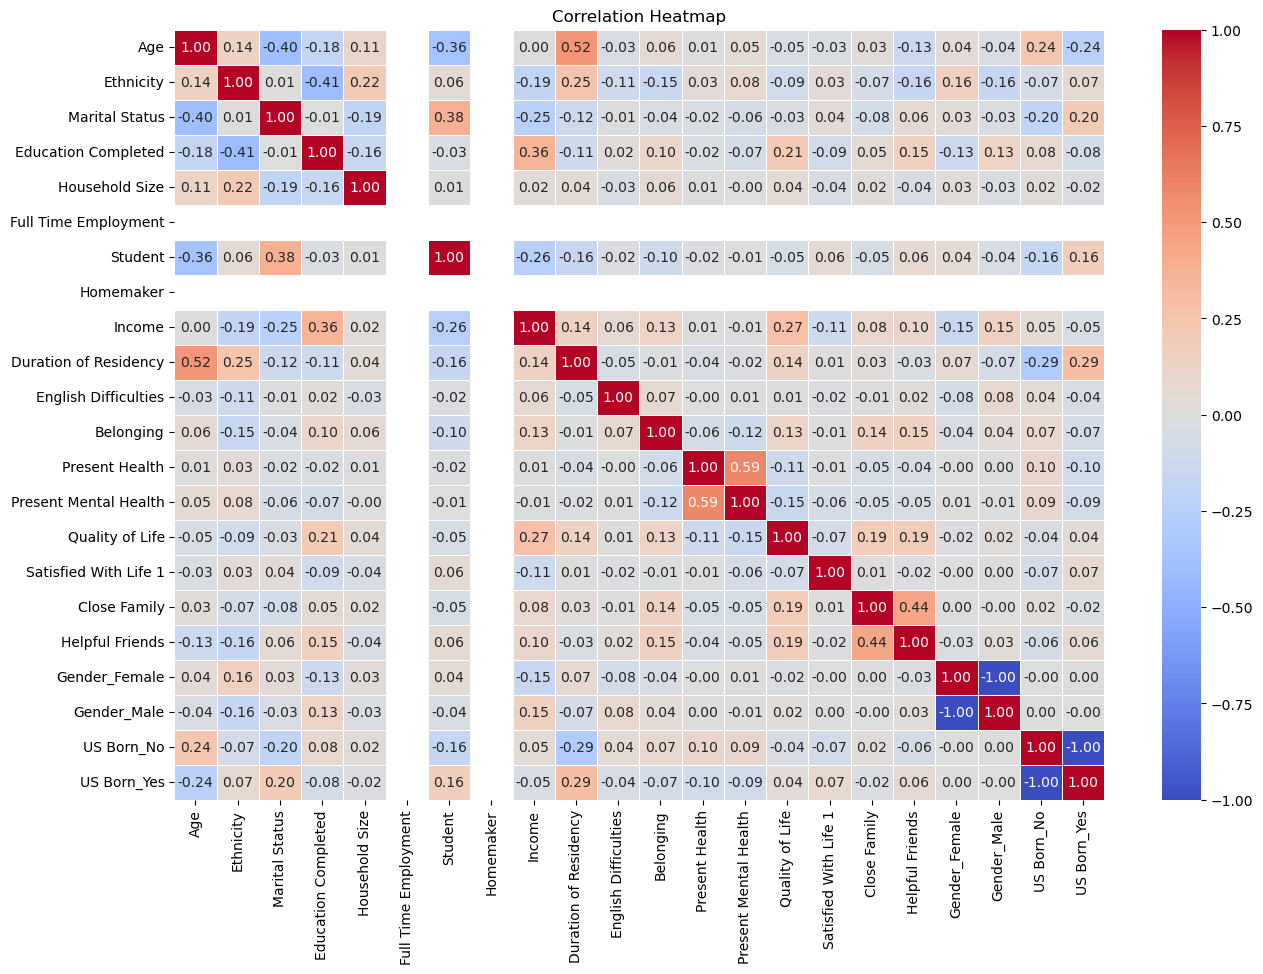

In [9]:
# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 5.8576751556710866e-15
                 Variable   Coefficient
0                     Age -3.751301e-16
1           Gender_Female -4.194540e-18
2             Gender_Male  1.436577e-16
3               Ethnicity -2.774531e-17
4          Marital Status  5.386812e-16
5     Education Completed -4.679906e-17
6          Household Size -4.316456e-17
7    Full Time Employment -1.110223e-16
8                 Student  6.501160e-16
9               Homemaker -3.469447e-17
10                 Income  2.340438e-16
11            US Born_Yes -6.168079e-16
12             US Born_No  6.445635e-16
13  Duration of Residency  4.806586e-16
14   English Difficulties  1.473048e-17
15              Belonging  6.750758e-16
16         Present Health  4.703840e-16
17  Present Mental Health -7.311675e-19
18        Quality of Life  1.000000e+00
19  Satisfied With Life 1  2.014874e-16
20           Close Family -3.887906e-16
21        Helpful Friends  6.397159e-17
Quality of Life = -3.7513007671887524e-16 * Age + -

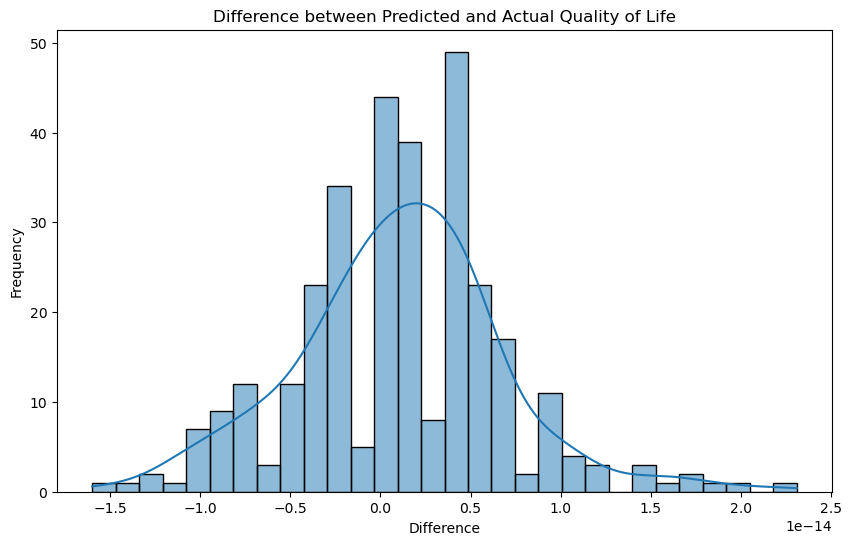

In [10]:
# Building Linear Regression for all the columns from above correlation matrix

all_columns = ['Age', 'Gender_Female','Gender_Male', 'Ethnicity', 'Marital Status', 'Education Completed',
                    'Household Size', 'Full Time Employment', 'Student',
                    'Homemaker', 'Income', 'US Born_Yes','US Born_No', 'Duration of Residency',
                    'English Difficulties', 'Belonging', 'Present Health',
                    'Present Mental Health', 'Quality of Life',
                    'Satisfied With Life 1', 'Close Family', 'Helpful Friends', ]

# Creating the feature matrix (X) and target vector (y)
X = df_filtered[all_columns]
y = df_filtered['Quality of Life']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Show coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Express the formula
formula = 'Quality of Life = ' + ' + '.join([f"{coef} * {var}" for coef, var in zip(model.coef_, X.columns)]) + f" + {model.intercept_}"
print(formula)

# Evaluate on exploratory set
exploratory_pred = model.predict(X_test)

# Calculate the difference between predicted and actual outcomes
difference = y_test - exploratory_pred

# Create a histogram of the differences
plt.figure(figsize=(10, 6))
sns.histplot(difference, kde=True, bins=30)
plt.title('Difference between Predicted and Actual Quality of Life')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


RMSE: 1.394363455440807
                Variable  Coefficient
0    Education Completed     0.089457
1                 Income     0.105781
2  Duration of Residency     0.014871
3   English Difficulties    -0.006516
4              Belonging     0.125777
5         Present Health    -0.003893
6  Present Mental Health    -0.091977
7           Close Family     0.129873
8        Helpful Friends     0.101936
Quality of Life = 0.08945720338188497 * Education Completed + 0.10578083287980354 * Income + 0.014870868226041655 * Duration of Residency + -0.006515616814287937 * English Difficulties + 0.12577703917142008 * Belonging + -0.003892932033465397 * Present Health + -0.0919774339623992 * Present Mental Health + 0.12987274525398768 * Close Family + 0.10193591320802177 * Helpful Friends + 5.099941646983511


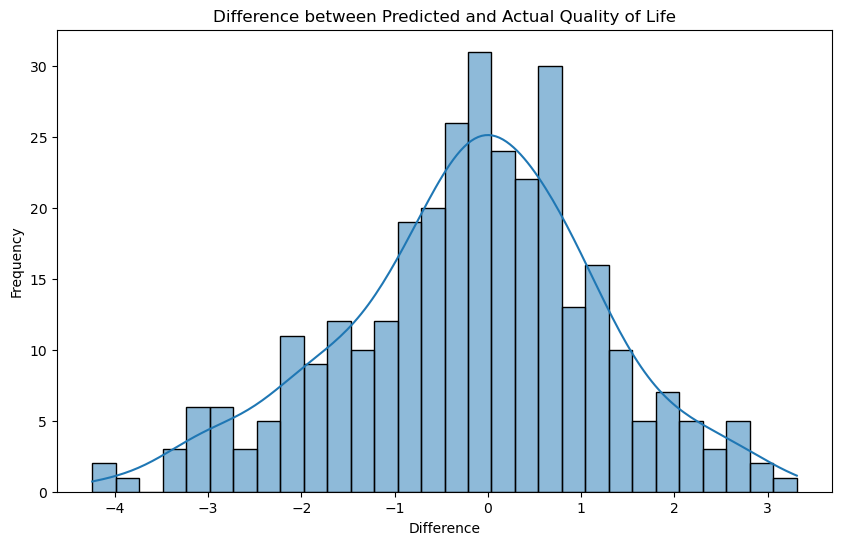

In [11]:
#Building Linear regression model for selected columns
# Selecting the desired columns
selected_columns = ['Education Completed', 'Income', 'Duration of Residency',
                    'English Difficulties', 'Belonging', 'Present Health',
                    'Present Mental Health', 'Close Family', 'Helpful Friends']

# Creating the feature matrix (X) and target vector (y)
X = df_filtered[selected_columns]
y = df_filtered['Quality of Life']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Show coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Express the formula
formula = 'Quality of Life = ' + ' + '.join([f"{coef} * {var}" for coef, var in zip(model.coef_, X.columns)]) + f" + {model.intercept_}"
print(formula)

# Evaluate on exploratory set
exploratory_pred = model.predict(X_test)

# Calculate the difference between predicted and actual outcomes
difference = y_test - exploratory_pred

# Create a histogram of the differences
plt.figure(figsize=(10, 6))
sns.histplot(difference, kde=True, bins=30)
plt.title('Difference between Predicted and Actual Quality of Life')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()
